# Distances in cosmology

This notebook will step you through calculating distances in cosmology. 


## 1. How far is a galaxy at redshift z?

To calculate how far a galaxy is if it has redshift z we need to integrate over the path of the photon since the time of emission to the time of observation. 

Again we can start with Friedmann's equation,

$$ H^2 = H_0^2\sum \Omega_x a^{-3(1+w_x)}, $$

and recall that the definition of redshift is that a=(1+z)^{-1}, therefore,

$$ H^2 = H_0^2\sum \Omega_x (1+z)^{3(1+w_x)}, $$

(notice the change of sign in the exponent).

Since $ds=0$ for a photon the metric gives $cdt = Rd\chi$.  Using $R=R_0a$ that can be rearranged to the equation for the comoving distance,

$$ R_0\chi = c\int \frac{dt}{a} = c\int \frac{dt}{da} \frac{da}{a} = c\int \frac{da}{\dot{a}a} $$

Differentiating $a$ with respect to $z$ gives $da = -(1+z)^{-2} dz$, and putting all of that together gives the equation for comoving distance as a function of redshift,

$$ R_0\chi = c\int_0^z \frac{dz}{H(z)}
= \frac{c}{H_0}\int_0^z \frac{dz}{E(z)}$$
where $E(z)\equiv H(z)/H_0$.  Written out longhand that is 
$$ E(z)= \left(\Omega_R (1+z)^4+\Omega_M (1+z)^3+\Omega_K (1+z)^2+\Omega_\Lambda\right)^{1/2}. $$
(Or some more complex model!) 


In [75]:
# First let's set up our packages
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

# And set some constants
c = 299792.458 # km/s (speed of light)

H0kmsmpc = 70.  # Hubble constant in km/s/Mpc
H0s = H0kmsmpc * 3.2408e-20 # H0 in inverse seconds is H0 in km/s/Mpc * (3.2408e-20 Mpc/km)
H0y = H0s * 3.154e7 * 1.e9 # H0 in inverse Giga years is H0 in inverse seconds * (3.154e7 seconds/year) * (1e9 years / Giga year)

### 1.1 Write some code to calculate the distance to a galaxy at redshift z

Define the function you need to integrate, and integrate it for a single value of z that you choose. 

In [76]:
# Write a function for the integrand, i.e. $1/E(z)$,
def Ez(z, om_r, om_m, om_l):
    om_k = 1 - om_r - om_m - om_l
    onePlusZ = 1 + z 
    return np.sqrt(om_r * onePlusZ**4 + om_m * onePlusZ**3 + om_k * onePlusZ**2 + om_l )

def integrand(z, om_r, om_m, om_l): 
    return 1/Ez(z, om_r, om_m, om_l)

ourInt = lambda z: integrand(z, 0, 0.7, 0.3) # for our universe

In [77]:
# Choose the redshift (e.g. z=0.3)
z=0.3

# Calculate the integral:
xx = integrate.quad(ourInt,0,z)[0] # comoving coordinate

# Sub in the required constants to get the comoving distance R_0*X
R0X = c*xx/H0y # Age in Gyr

print(f'Comoving distance to a galaxy at z={z:.3f} is {R0X:.2f} Glyr')

Comoving distance to a galaxy at z=0.300 is 1081401.32 Glyr


### 1.2 How far is that galaxy at different times?
The comoving distance is normalised such that it is the distance at the present day.  How far was that galaxy (the one we currently observe at redshift z) at different times? To get the distance at a different time, just multiply the comoving distance by the scalefactor at that time. 
$$ D(t(z),\chi(z)) = a(t) R_0\chi(z) = a(t) D_0(t_0,z) $$

Example: take a galaxy at $z=0.3$.  
* What was its distance from us when the universe was half its current size?
* How far was it at the time the light we're seeing was emitted?  Recall that the scalefactor at the time of emisison can be derived from its redshift, i.e. $a=1/(1+z)$.

In [78]:
# Insert your code here
# using \chi as computed in prior cell
distance_half_size = 1/2 * R0X # scalefactor 1/2
distance_at_emission = 1/(1+z) * R0X 

# Remember to write print statements to see the answers. 
print(f'Distance to a galaxy at z={z:.3f} when a=0.5 is {distance_half_size:.2f} Glyr')
print(f'Distance to a galaxy at z={z:.3f} when the light we see was emitted is {distance_at_emission:.2f} Glyr')


Distance to a galaxy at z=0.300 when a=0.5 is 540700.66 Glyr
Distance to a galaxy at z=0.300 when the light we see was emitted is 831847.17 Glyr


### 1.3 Turn that into a plot of distance vs redshift

Make an array of redshifts and make a loop to calculate the distance at each of those redshifts.  Then plot distance vs redshift. 

* Make one plot that is current distance ($R_0\chi$) vs redshift.
* Make another showing distance at the time of emission ($aR_0\chi$) vs redshift. 

Do you notice anything interesting about the behaviour of these two different distances?

z_arr=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. ])


Text(0, 0.5, 'Distances (Glyr)')

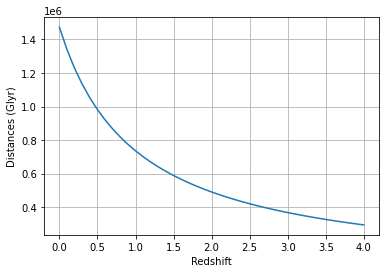

In [79]:
# Start by making an array of redshifts
zstart = 0.0
zstop = 4.1
zstep = 0.1 # Make this finer to make the plot smoother
z_arr = np.arange(zstart,zstop,zstep)
print(f'{z_arr=}')

# Now add your code to calculate distance vs redshift and then plot it.  
# Copy what was done in the scalefactor vs time plots from the previous workbook, and adapt it to your need here.

# z = 0.3 distance
# copied for consistency!
z = 0.3 
xx = integrate.quad(ourEz,0,z, args=())[0]
R0X = c*xx/H0y

distances = 1/(1+z_arr) * R0X 

fig, ax = plt.subplots()
ax.plot(z_arr, distances)
ax.grid()
ax.set_xlabel('Redshift')
ax.set_ylabel('Distances (Glyr)')

### 1.4 Luminosity distance and Angular diameter distance

Luminosity distance ($D_L$) and angular diameter distance ($D_A$) are given by,
$$ D_L = R S_k(\chi) (1+z) $$
$$ D_A = R S_k(\chi) / (1+z) $$

Where $S_k(\chi) = \sin(\chi),\chi,\sinh(\chi)$ for positive, flat, and negative curvatures respectively, i.e. for $\Omega_K<0$, $\Omega_K=0$, and $\Omega_K>0$ respectively.  
(Yes, $\Omega_K<0$ is positive curvature!) 

#### Hint!  How to calculate $S_k(\chi)$
Note that if you've kept the constants out of your definition of Ez then, xx $:= R_0\chi/(c/H_0)$.  It is handy to know that,
$$  \frac{c}{R_0H_0}=\sqrt{|\Omega_K|} $$
so to just get $\chi$ you can use xx multiplied by $\sqrt{|\Omega_K|}$.  
Then to get $R_0 S_k(\chi)/(c/H_0)$ divide the whole thing by $\sqrt{|\Omega_K|}$.

In [80]:
# You may find this function useful to calculate the perpendicular comoving distance R0*Sk(X)
    # Corrects the comoving distance, xx, for curvature, ok.
    # Result is perpendicular comoving distance / (c/H0)  
    # i.e. it's the distance to use in angular diameter and luminosity distance
def Sk(xx, ok):
    if ok < 0.0:
        return np.sin(np.sqrt(-ok)*xx)/np.sqrt(-ok)
    elif ok > 0.0:
        return np.sinh(np.sqrt(ok)*xx)/np.sqrt(ok)
    else:
        return xx
# This returns a value for R_0S_k(\chi) that you multiply by c/H_0 to give it units.

#### Calculate $D_L(z)$ and $D_A(z)$
Plot the present day values ($R=R_0$) of luminosity distance and angular diameter distance as a function of redshift. Do you notice anything interesting about the angular diameter distance at high-redshift?

Text(0, 0.5, 'Distances (Glyr)')

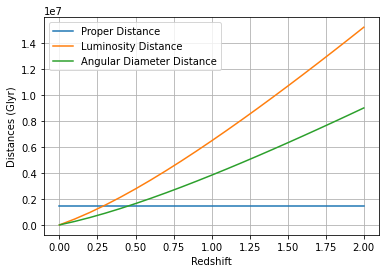

In [86]:
om = 0.3 
ol = 0.7
cH0Glyr = c / H0y # todo check units 

zstart = 0.0
zstop = 2.1
zstep = 0.1 # Make this finer to make the plot smoother
z_arr = np.arange(zstart,zstop,zstep)

x_arr = np.array([integrate.quad(integrand,0,z, args=(0, om, ol))[0] for z in z_arr])

ok = 1.0-om-ol
# Proper distance
DD = R0X * np.ones(len(z_arr))              
# Luminosity distance
DL = Sk(x_arr, ok) * (1 + z_arr) * cH0Glyr
# Angular diameter distance
DA = DL/(1+z)**2         

fig, ax = plt.subplots()


ax.plot(z_arr,DD,label='Proper Distance')
ax.plot(z_arr,DL,label='Luminosity Distance')
ax.plot(z_arr,DA,label='Angular Diameter Distance')
ax.legend()
ax.grid()
ax.set_xlabel('Redshift')
ax.set_ylabel('Distances (Glyr)')